In [1]:
using DataFrames
using CSV
using Taro
using Plots
pyplot();
df=CSV.read("realdata.csv")#,"F6:H654")
#load If, It, Twc
df_input = df[70:653, [:Column6, :Column13, :Column11 ]]
df_output = df[70:653, [:Column7, :Column8]]
df_water_temp = df[70:653, [:Column10, :Column9]]
If, It, Twc = df_input[1],df_input[2],df_input[3]
Ts_meas, TFe_meas = df_output[1], df_output[2]
Tac, Tah = df_water_temp[1],df_water_temp[2]
# All data are combination of string and missing so converting
# it back to float64
If_float, It_float, Twc_float,Ts_meas_float, TFe_meas_float =zeros(584),zeros(584),zeros(584),zeros(584),zeros(584)
Tac_meas_float, Tah_meas_float = zeros(584), zeros(584)
for i in range(1,step=1,584)
    If_float[i]=parse(Float64, If[i])
    It_float[i]=parse(Float64, It[i])
    Twc_float[i]=parse(Float64, Twc[i])
    Ts_meas_float[i]=parse(Float64, Ts_meas[i])
    TFe_meas_float[i]=parse(Float64, TFe_meas[i])
    Tac_meas_float[i]=parse(Float64, Tac[i])
    Tah_meas_float[i]=parse(Float64, Tah[i])
end

# Plotting real data
#t_sim=range(0,stop=648,step=1)
#plot(t_sim,Ts_meas_float)
#plot(t_sim, If_float)

In [42]:
## Simulator Model 1
#    counter-current heat exchanger of Model 1
#Filename:Simulator-real-data.ipynb
#Author:Madhusudhan Pandey, USN, EPE
#Date: March 20, 2019
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter3/";

using NLsolve
using DifferentialEquations
using Plots
pyplot();# pyplot attributes on backend
using LaTeXStrings;
using Compat, Random, Distributions
# Linewidths and styles
LW1 = 2 
LW2 = 1.5
LS1 = :solid
LS2 = :dot
LS3 = :dashdot
LS4 = :dash;
# inputs (need to specify first than parameters as Qdfs is input dependent and considered as parameters)


Ifd = If_float
It = It_float
Twc = Twc_float#3.8
QdFes = 212.
Wdf = 528.
mdw = 32.42+0.038*QdFes
mda = 29.6+0.035*QdFes
function u_Ifd(t)
    # Iterative value of Twc from real data
    return Ifd[t]
end
function u_It(t)
    # Iterative value of Twc from real data
    return It[t]
end
function u_Twc(t)
    # Iterative value of Twc from real data
    return Twc[t]
end



#
#u = [Twc, Ifd, It, QdFes, Wdf, mdw, mda]

#Specifying Parameters
pa = 1.01e5 # " Atmospheric pressure , Pa "
#
chpa = 1.012#1.15 # " Specific heat capacity air , kJ.kg -1. K -1 # " 
chpw = 4.1813#4.2 # " Specific heat capacity water , kJ.kg -1. K -1 # " 
chpCu = 0.385#0.385 # " Specific heat capacity copper , kJ.kg -1. K -1 # " 
chpFe = 0.412#0.465 # " Specific heat capacity iron , kJ.kg -1. K -1 # " 
#
mr = 0.9*9260. # " Mass of copper in rotor , kg # " 
ms = 0.9*6827. # " Mass of copper in stator , kg # " 
mFe = 1.1*71200.#66700.#71200. # " Mass of iron in stator , kg # " 
#
VhCu = 0.112e-3 # " Specific volume of copper , m3 / kg # " 
VhFe = 0.127e-3 # " Specific volume of iron , m3 / kg # " 
#
Vr = mr*VhCu # " Rotor copper volume , m3 # " 
Vs = ms*VhCu # " Stator copper volume , m3 # " 
VFe = mFe*VhFe # " Stator iron volume , m3 # " 
#
UAr2d = 2.9#2.7 # " Heat transfer , rotor copper to air gap , kW / K # " 
UAs2Fe = 22.#20. # " Heat transfer , stator copper to stator iron , kW /K" 
UAFe2a = 12.#14.285 #14.3 # " Heat transfer , rotor iron to hot air , kW / K # " 
Up=0.88 # "Product of overall heat transfer and perimeter"
#
Hha_o = 0. # " Enthalpy of formation air , kJ / kg " 
HhCu_o = 0. # " Enthalpy of formation copper , kJ / kg # " 
HhFe_o = 0. # " Enthalpy of formation iron , kJ / kg # " 
#
Ta_o = 25. # " Standard state temperature air , C # " 
TCu_o = 25. # " Standard state temperature copper , C # " 
TFe_o = 25. # " Standard state temperature iron , C # " 
#
Rr = 0.127e-3 # " Ohmic resistance , rotor copper , kOhm, at 25 C # " 
Rs = 1.95e-6 # " Ohmic resistance , stator copper , kOhm, at 25 C"
#
aCu = 2.180095589906275
bCu = 0.003506973869188881
cCu = -3.2981760896745546e-6
aFe = 4.407395605263029
bFe = -0.0064858434375006735
cFe = 8.504122915160675e-6
aa = 3.422877370340307
ba = 0.00012182906764467854
ca = 4.585650093061106e-7
aw = 3.861924085945121
bw = 0.00040187478031285565
cw = 7.253810555760839e-7
alphaCu = 0.00404
R = 8.314 # " J.K-1.mol-1 # "
MCu = 63.54 # " Molecular mass of Copper, g/mol"
MFe = 55.84 # "Molecular mass of Iron, g/mol"
Ma = 28.97 # "Molecular mass of Air, g/mol"
Mw = 18.01 # "Molecular mass of Water, g/mol"
Qdfs = 0.8*Wdf
#tuples of parameters
par = [pa,chpa,chpw,chpCu,chpFe,mr,ms,mFe,VhCu,VhFe,
    Vr,Vs,VFe,UAr2d,UAs2Fe,UAFe2a,Hha_o,HhCu_o,
    HhFe_o,Ta_o,TCu_o,TFe_o,Rr,Rs,aCu,bCu,cCu,aFe,bFe,cFe,aa,ba,ca,aw,bw,cw,alphaCu,R,MCu,
    MFe,Ma,Mw,Qdfs];


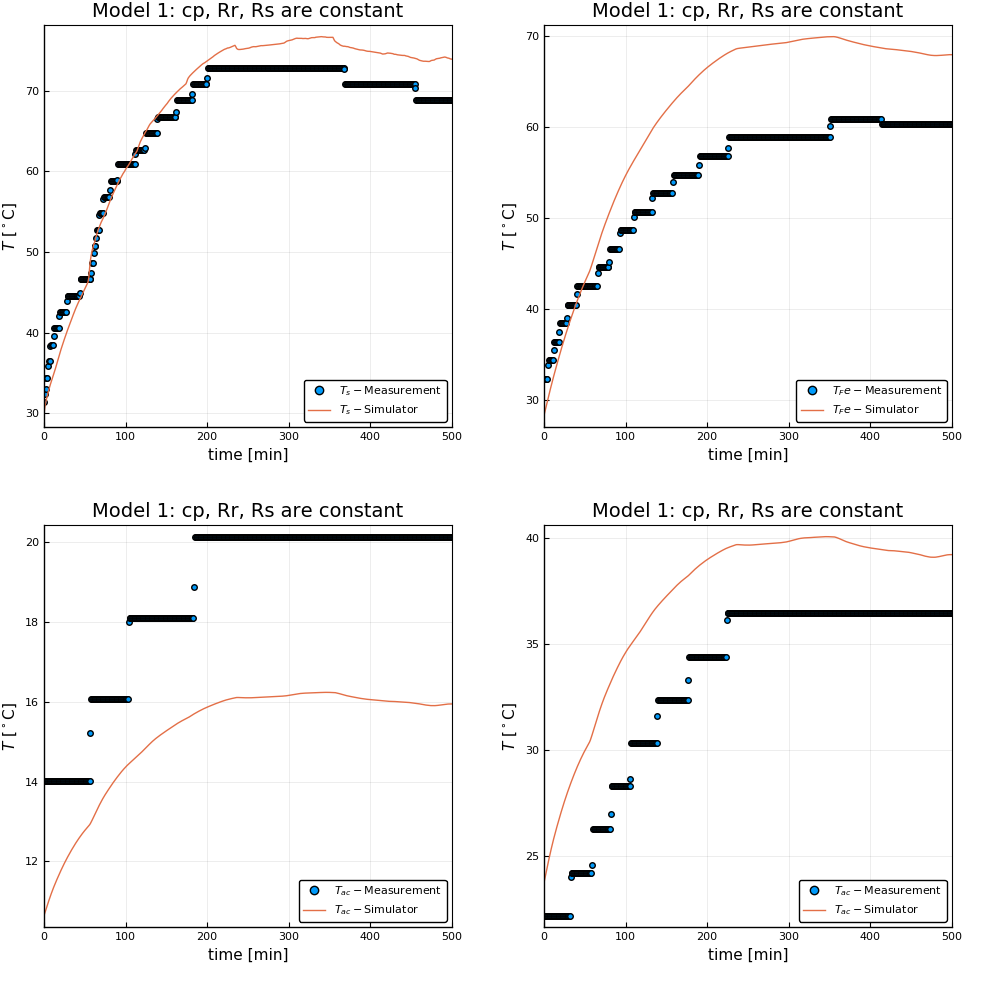

In [45]:
# MODEL 1: cp, Rr, Rs are Constant

# This function returns Tac, Tad, Tah
function find_air_temperatures(temp_of_states, par;iterator=iterator)
    Tr, Ts, TFe= temp_of_states
    #print(iterator)
    function f!(F, x)
        Tac,Tad,Tah = x[1], x[2], x[3]
        F[1] = mda*chpa*(Tac-Tad)+UAr2d*(Tr-Tad)+Qdfs
        F[2] = mda*chpa*(Tad-Tah)+UAFe2a*(TFe-Tah)
        # solving for Tac function
        #length span of heat exchanger
        xspan=(0.0,50.0)
        function heat_exchanger!(dT,T,par,t)
            # Counter-current
            # 
            dT[1]=Up/(chpa*mda)*(T[2]-T[1])
            dT[2]=Up/(chpw*mdw)*(T[2]-T[1])
        end
        
        #initialGuess=[Tah,Twh]
        initial_guess=[Ta_o,u_Twc(iterator)]
        function bc!(residual,T,par,t)
            residual[1]=T[1][1]-Tah
            residual[2]=T[end][2]-u_Twc(iterator)
        end
        
        bvp=BVProblem(heat_exchanger!,bc!,initial_guess,xspan,par)
        sol=solve(bvp, Shooting(Vern7()))
        a,b=sol(50) #solves for Tac,Twc
        c,d=sol(0) #solves for Tah,Twh
        F[3] = Tac - a
    end
    return nlsolve(f!,[Ta_o,Ta_o,Ta_o]).zero   
end

#This function returns ODE
function process_f(x_state, iterator)
    Trotor, Tstator, Tiron = x_state
    #print("inside ODE")
    Taircold, Tairdelta, Tairhot = find_air_temperatures([Trotor, Tstator, Tiron], par;iterator=iterator)#[Tr0, Ts0, TFe0]
    Tr=Trotor + dt*(1.1*Rr*u_Ifd(iterator)^2-UAr2d*(Trotor-Tairdelta))/(mr*chpCu)
    Ts=Tstator + dt*(3*Rs*u_It(iterator)^2-UAs2Fe*(Tstator-Tiron))/(ms*chpCu)
    TFe=Tiron + dt*(UAs2Fe*(Tstator-Tiron)-UAFe2a*(Tiron-Tairhot)+QdFes)/(mFe*chpFe)
    return Taircold, Tairdelta, Tairhot, Tr, Ts, TFe
end

#simulating model
Tr0, Ts0, TFe0 = 28.,28.,28.
Tac_sim,Tad_sim,Tah_sim,Twh_sim,Tr_sim, Ts_sim, TFe_sim=zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0)
dt=60
t_sim=range(0,stop=583*60,step=60)
x_initial=Tr0, Ts0,TFe0
for iterator=1:length(t_sim)
    Tac, Tad, Tah, Tr, Ts, TFe = process_f(x_initial, iterator)
    append!(Tr_sim, Tr)
    append!(Ts_sim, Ts)
    append!(TFe_sim, TFe)
    append!(Tac_sim, Tac)
    append!(Tad_sim, Tad)
    append!(Tah_sim, Tah)
    #append!(Twh_sim, Twh)
    x_initial=Tr, Ts, TFe
end
plot(t_sim/60,Ts_meas_float,label=L"T_s-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Ts_sim, label=L"T_s-\mathrm{Simulator}")
Model1Ts=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,TFe_meas_float,label=L"T_Fe-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, TFe_sim, label=L"T_Fe-\mathrm{Simulator}")
Model1TFe=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tac_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tac_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tac=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tah_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tah_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tah=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)

using Plots.PlotMeasures
plot(Model1Ts, Model1TFe, Model1Tac,Model1Tah,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

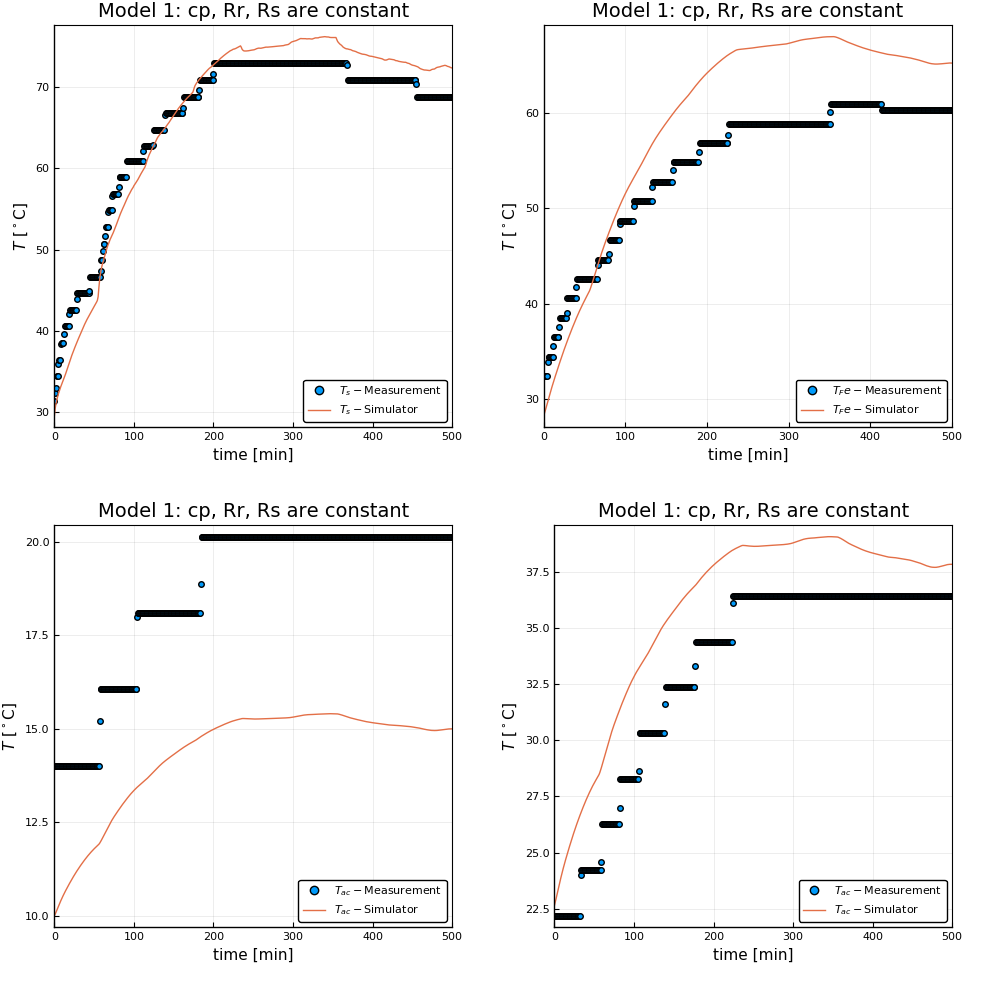

In [37]:
# MODEL 2: cp-constant, Rr, Rs are f(T)

# This function returns Tac, Tad, Tah
function find_air_temperatures(temp_of_states, par;iterator=iterator)
    Tr, Ts, TFe= temp_of_states
    #print(iterator)
    function f!(F, x)
        Tac,Tad,Tah = x[1], x[2], x[3]
        F[1] = mda*chpa*(Tac-Tad)+UAr2d*(Tr-Tad)+Qdfs
        F[2] = mda*chpa*(Tad-Tah)+UAFe2a*(TFe-Tah)
        # solving for Tac function
        #length span of heat exchanger
        xspan=(0.0,50.0)
        function heat_exchanger!(dT,T,par,t)
            # Counter-current
            # 
            dT[1]=Up/(chpa*mda)*(T[2]-T[1])
            dT[2]=Up/(chpw*mdw)*(T[2]-T[1])
        end
        
        #initialGuess=[Tah,Twh]
        initial_guess=[Ta_o,u_Twc(iterator)]
        function bc!(residual,T,par,t)
            residual[1]=T[1][1]-Tah
            residual[2]=T[end][2]-u_Twc(iterator)
        end
        
        bvp=BVProblem(heat_exchanger!,bc!,initial_guess,xspan,par)
        sol=solve(bvp, Shooting(Vern7()))
        a,b=sol(50) #solves for Tac,Twc
        c,d=sol(0) #solves for Tah,Twh
        F[3] = Tac - a
    end
    return nlsolve(f!,[Ta_o,Ta_o,Ta_o]).zero   
end

#This function returns ODE
function process_f(x_state, iterator)
    Trotor, Tstator, Tiron = x_state
    #print("inside ODE")
    Taircold, Tairdelta, Tairhot = find_air_temperatures([Trotor, Tstator, Tiron], par;iterator=iterator)#[Tr0, Ts0, TFe0]
    Tr=Trotor + dt*(1.1*Rr*(1+alphaCu*(Trotor-TCu_o))*u_Ifd(iterator)^2-UAr2d*(Trotor-Tairdelta))/(mr*chpCu)
    Ts=Tstator + dt*(3*Rs*(1+alphaCu*(Tstator-TCu_o))*u_It(iterator)^2-UAs2Fe*(Tstator-Tiron))/(ms*chpCu)
    TFe=Tiron + dt*(UAs2Fe*(Tstator-Tiron)-UAFe2a*(Tiron-Tairhot)+QdFes)/(mFe*chpFe)
    return Taircold, Tairdelta, Tairhot, Tr, Ts, TFe
end

#simulating model
Tr0, Ts0, TFe0 = 28.,28.,28.
Tac_sim,Tad_sim,Tah_sim,Twh_sim,Tr_sim, Ts_sim, TFe_sim=zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0)
dt=60
t_sim=range(0,stop=583*60,step=60)
x_initial=Tr0, Ts0,TFe0
for iterator=1:length(t_sim)
    Tac, Tad, Tah, Tr, Ts, TFe = process_f(x_initial, iterator)
    append!(Tr_sim, Tr)
    append!(Ts_sim, Ts)
    append!(TFe_sim, TFe)
    append!(Tac_sim, Tac)
    append!(Tad_sim, Tad)
    append!(Tah_sim, Tah)
    #append!(Twh_sim, Twh)
    x_initial=Tr, Ts, TFe
end
plot(t_sim/60,Ts_meas_float,label=L"T_s-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Ts_sim, label=L"T_s-\mathrm{Simulator}")
Model1Ts=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,TFe_meas_float,label=L"T_Fe-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, TFe_sim, label=L"T_Fe-\mathrm{Simulator}")
Model1TFe=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tac_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tac_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tac=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tah_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tah_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tah=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)

using Plots.PlotMeasures
plot(Model1Ts, Model1TFe, Model1Tac,Model1Tah,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

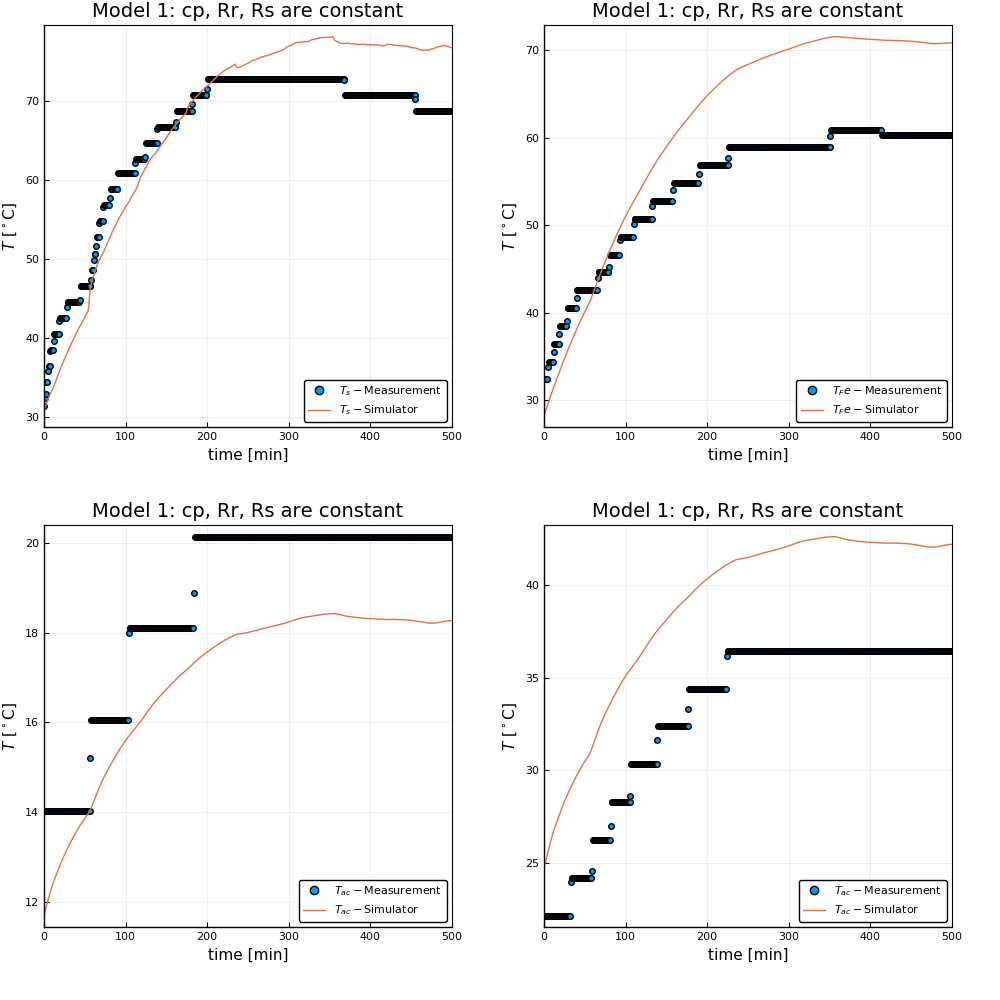

In [44]:
# MODEL 3: cp=f(T) Rr, Rs = constant

# This function returns Tac, Tad, Tah
function find_air_temperatures(temp_of_states, par;iterator=iterator)
    Tr, Ts, TFe= temp_of_states
    #print(iterator)
    function f!(F, x)
        Tac,Tad,Tah = x[1], x[2], x[3]
        F[1] = mda*R/Ma*((aa+ba*Tac+ca*Tac^2)*Tac-(aa+ba*Tad+ca*Tad^2)*Tad)+UAr2d*(Tr-Tad)+Qdfs
        F[2] = mda*R/Ma*((aa+ba*Tad+ca*Tad^2)*Tad-(aa+ba*Tah+ca*Tah^2)*Tah)+UAFe2a*(TFe-Tah)
        # solving for Tac function
        #length span of heat exchanger
        xspan=(0.0,50.0)
        function heat_exchanger!(dT,T,par,t)
            # Counter-current
            # 
            dT[1]=Up/(R/Ma*(aa+ba*T[1]+ca*(T[1])^2)*mda)*(T[2]-T[1])
            dT[2]=Up/(R/Mw*(aw+bw*T[2]+ca*(T[2])^2)*mdw)*(T[2]-T[1])
        end
        
        #initialGuess=[Tah,Twh]
        initial_guess=[Ta_o,u_Twc(iterator)]
        function bc!(residual,T,par,t)
            residual[1]=T[1][1]-Tah
            residual[2]=T[end][2]-u_Twc(iterator)
        end
        
        bvp=BVProblem(heat_exchanger!,bc!,initial_guess,xspan,par)
        sol=solve(bvp, Shooting(Vern7()))
        a,b=sol(50) #solves for Tac,Twc
        c,d=sol(0) #solves for Tah,Twh
        F[3] = Tac - a
    end
    return nlsolve(f!,[Ta_o,Ta_o,Ta_o]).zero   
end

#This function returns ODE
function process_f(x_state, iterator)
    Trotor, Tstator, Tiron = x_state
    #print("inside ODE")
    Taircold, Tairdelta, Tairhot = find_air_temperatures([Trotor, Tstator, Tiron], par;iterator=iterator)#[Tr0, Ts0, TFe0]
    Tr=Trotor + dt*(1.1*Rr*u_Ifd(iterator)^2-UAr2d*(Trotor-Tairdelta))/(mr*R/MCu*(aCu+bCu*Trotor+cCu*Trotor^2))
    Ts=Tstator + dt*(3*Rs*u_It(iterator)^2-UAs2Fe*(Tstator-Tiron))/(ms*R/MCu*(aCu+bCu*Tstator+cFe*Tstator^2))
    TFe=Tiron + dt*(UAs2Fe*(Tstator-Tiron)-UAFe2a*(Tiron-Tairhot)+QdFes)/(mFe*R/MFe*(aFe+bFe*Tiron+cFe*Tiron^2))
    return Taircold, Tairdelta, Tairhot, Tr, Ts, TFe
end

#simulating model
Tr0, Ts0, TFe0 = 28.,28.,28.
Tac_sim,Tad_sim,Tah_sim,Twh_sim,Tr_sim, Ts_sim, TFe_sim=zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0)
dt=60
t_sim=range(0,stop=583*60,step=60)
x_initial=Tr0, Ts0,TFe0
for iterator=1:length(t_sim)
    Tac, Tad, Tah, Tr, Ts, TFe = process_f(x_initial, iterator)
    append!(Tr_sim, Tr)
    append!(Ts_sim, Ts)
    append!(TFe_sim, TFe)
    append!(Tac_sim, Tac)
    append!(Tad_sim, Tad)
    append!(Tah_sim, Tah)
    #append!(Twh_sim, Twh)
    x_initial=Tr, Ts, TFe
end
plot(t_sim/60,Ts_meas_float,label=L"T_s-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Ts_sim, label=L"T_s-\mathrm{Simulator}")
Model1Ts=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,TFe_meas_float,label=L"T_Fe-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, TFe_sim, label=L"T_Fe-\mathrm{Simulator}")
Model1TFe=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tac_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tac_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tac=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tah_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tah_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tah=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)

using Plots.PlotMeasures
plot(Model1Ts, Model1TFe, Model1Tac,Model1Tah,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

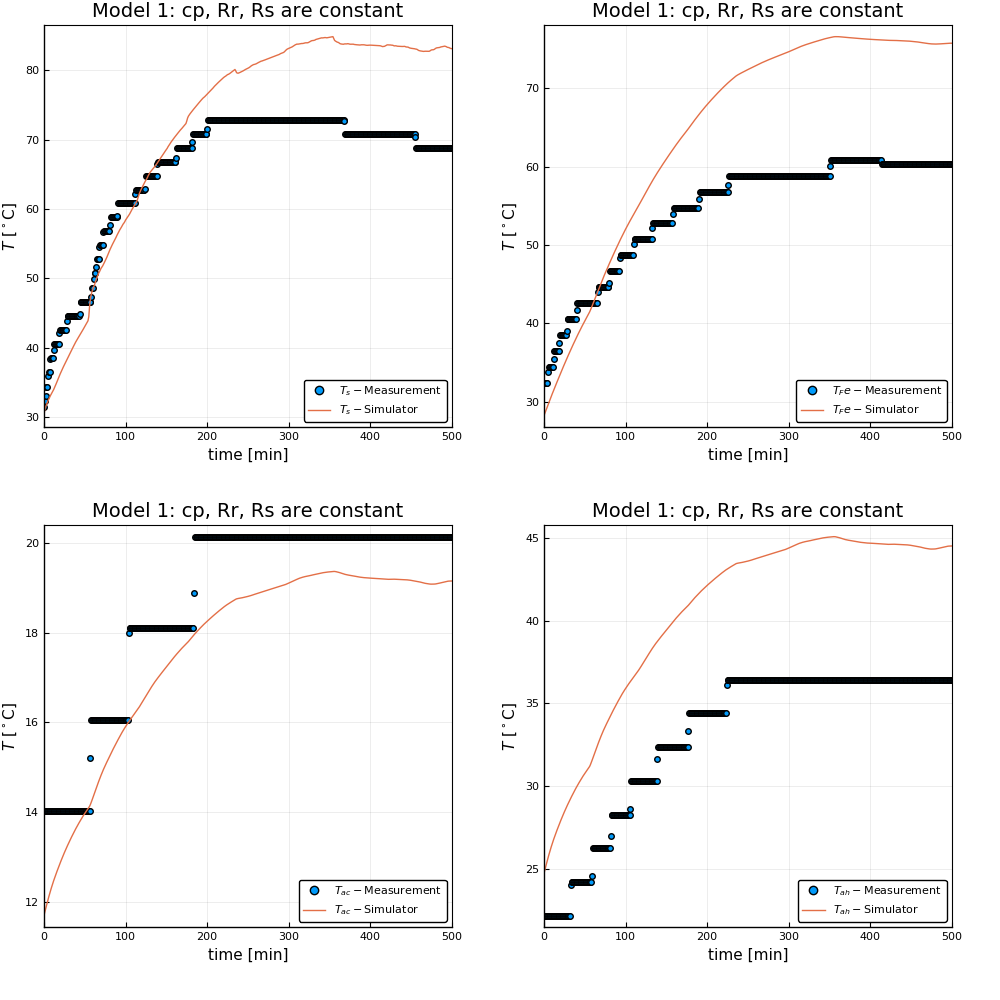

In [43]:
# MODEL 4: cp,Rr and Rs are temperature dependence

# This function returns Tac, Tad, Tah
function find_air_temperatures(temp_of_states, par;iterator=iterator)
    Tr, Ts, TFe= temp_of_states
    #print(iterator)
    function f!(F, x)
        Tac,Tad,Tah = x[1], x[2], x[3]
        F[1] = mda*R/Ma*((aa+ba*Tac+ca*Tac^2)*Tac-(aa+ba*Tad+ca*Tad^2)*Tad)+UAr2d*(Tr-Tad)+Qdfs
        F[2] = mda*R/Ma*((aa+ba*Tad+ca*Tad^2)*Tad-(aa+ba*Tah+ca*Tah^2)*Tah)+UAFe2a*(TFe-Tah)
        # solving for Tac function
        #length span of heat exchanger
        xspan=(0.0,50.0)
        function heat_exchanger!(dT,T,par,t)
            # Counter-current
            # 
            dT[1]=Up/(R/Ma*(aa+ba*T[1]+ca*(T[1])^2)*mda)*(T[2]-T[1])
            dT[2]=Up/(R/Mw*(aw+bw*T[2]+ca*(T[2])^2)*mdw)*(T[2]-T[1])
        end
        
        #initialGuess=[Tah,Twh]
        initial_guess=[Ta_o,u_Twc(iterator)]
        function bc!(residual,T,par,t)
            residual[1]=T[1][1]-Tah
            residual[2]=T[end][2]-u_Twc(iterator)
        end
        
        bvp=BVProblem(heat_exchanger!,bc!,initial_guess,xspan,par)
        sol=solve(bvp, Shooting(Vern7()))
        a,b=sol(50) #solves for Tac,Twc
        c,d=sol(0) #solves for Tah,Twh
        F[3] = Tac - a
    end
    return nlsolve(f!,[Ta_o,Ta_o,Ta_o]).zero   
end

#This function returns ODE
function process_f(x_state, iterator)
    Trotor, Tstator, Tiron = x_state
    #print("inside ODE")
    Taircold, Tairdelta, Tairhot = find_air_temperatures([Trotor, Tstator, Tiron], par;iterator=iterator)#[Tr0, Ts0, TFe0]
    Tr=Trotor + dt*(1.1*Rr*(1+alphaCu*(Trotor-TCu_o))*u_Ifd(iterator)^2-UAr2d*(Trotor-Tairdelta))/(mr*R/MCu*(aCu+bCu*Trotor+cCu*Trotor^2))
    Ts=Tstator + dt*(3*Rs*(1+alphaCu*(Tstator-TCu_o))*u_It(iterator)^2-UAs2Fe*(Tstator-Tiron))/(ms*R/MCu*(aCu+bCu*Tstator+cFe*Tstator^2))
    TFe=Tiron + dt*(UAs2Fe*(Tstator-Tiron)-UAFe2a*(Tiron-Tairhot)+QdFes)/(mFe*R/MFe*(aFe+bFe*Tiron+cFe*Tiron^2))
    return Taircold, Tairdelta, Tairhot, Tr, Ts, TFe
end

#simulating model
Tr0, Ts0, TFe0 = 28.,28.,28.
Tac_sim,Tad_sim,Tah_sim,Twh_sim,Tr_sim, Ts_sim, TFe_sim=zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0),zeros(0)
dt=60
t_sim=range(0,stop=583*60,step=60)
x_initial=Tr0, Ts0,TFe0
for iterator=1:length(t_sim)
    Tac, Tad, Tah, Tr, Ts, TFe = process_f(x_initial, iterator)
    append!(Tr_sim, Tr)
    append!(Ts_sim, Ts)
    append!(TFe_sim, TFe)
    append!(Tac_sim, Tac)
    append!(Tad_sim, Tad)
    append!(Tah_sim, Tah)
    #append!(Twh_sim, Twh)
    x_initial=Tr, Ts, TFe
end
plot(t_sim/60,Ts_meas_float,label=L"T_s-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Ts_sim, label=L"T_s-\mathrm{Simulator}")
Model1Ts=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,TFe_meas_float,label=L"T_Fe-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, TFe_sim, label=L"T_Fe-\mathrm{Simulator}")
Model1TFe=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tac_meas_float,label=L"T_{ac}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tac_sim, label=L"T_{ac}-\mathrm{Simulator}")
Model1Tac=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)
plot(t_sim/60,Tah_meas_float,label=L"T_{ah}-\mathrm{Measurement}",seriestype = :scatter )
plot!(t_sim/60, Tah_sim, label=L"T_{ah}-\mathrm{Simulator}")
Model1Tah=plot!(title="Model 1: cp, Rr, Rs are constant",xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]",xlim=(0,500),framestyle = :box)

using Plots.PlotMeasures
plot(Model1Ts, Model1TFe, Model1Tac,Model1Tah,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

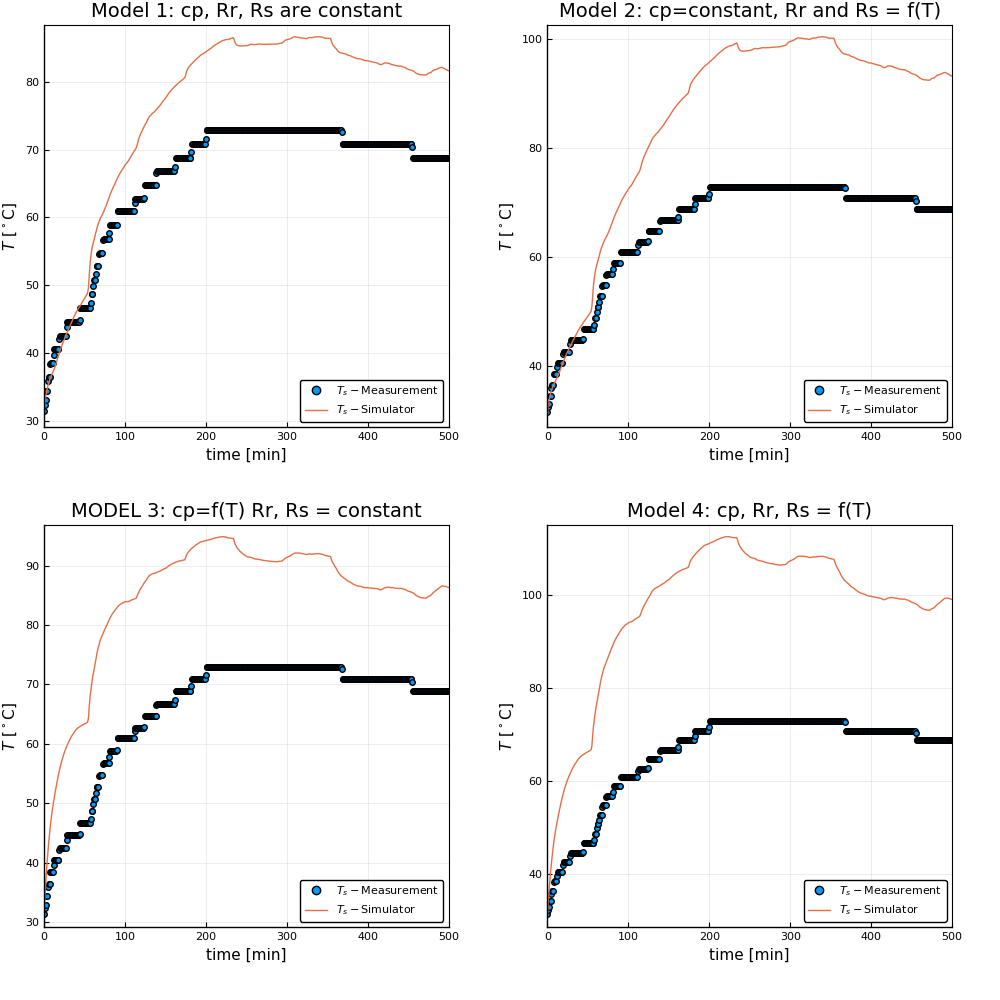

In [105]:
using Plots.PlotMeasures
plot(Model1, Model2, Model3, Model4,
        layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:bottomright)

In [106]:
function f(du,u,p,t)
  du[1] = dx = p[1]*u[1] - u[1]*u[2]
  du[2] = dy = -3*u[2] + u[1]*u[2]
end

u0 = [1.0;1.0]
tspan = (0.0,10.0)
p = [1.5]
prob = ODEProblem(f,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [108]:
sol = solve(prob,Tsit5())
t = collect(range(0,stop=10,length=200))
using RecursiveArrayTools # for VectorOfArray
randomized = VectorOfArray([(sol(t[i]) + .01randn(2)) for i in 1:length(t)])
data = convert(Array,randomized)

2×200 Array{Float64,2}:
 1.00546   1.03193   1.07517   1.0935    …  0.992394  1.01499   1.01994 
 0.995289  0.917836  0.798779  0.752608     1.09992   0.994985  0.910059